In [1]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps

In [2]:
df=pd.read_csv('V_superdarn_mean_winds.csv')
df_w=pd.read_csv('V_waccmxdart_mean_winds.csv')

In [3]:
df = df.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df = df.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df)

Ending dataframe:
                    Date   Kod   Pgr    Sas   Rkn   Pyk   Han
0    2009-01-12 00:00:00  4.03  0.95  -4.12 -3.92 -3.38  2.57
1    2009-01-12 01:00:00  3.97  0.98  -4.14 -4.16 -3.52  2.61
2    2009-01-12 02:00:00  3.82  1.06  -4.20 -4.15 -3.58  2.73
3    2009-01-12 03:00:00  3.95  1.00  -4.26 -4.43 -3.86  3.04
4    2009-01-12 04:00:00  3.97  1.02  -4.53 -4.14 -4.11  3.29
...                  ...   ...   ...    ...   ...   ...   ...
1555 2009-03-17 19:00:00  4.81   NaN   9.98  2.36  0.44  0.32
1556 2009-03-17 20:00:00  4.85   NaN  10.17  2.55  0.36  0.17
1557 2009-03-17 21:00:00  4.91   NaN  10.28  2.77  0.51  0.02
1558 2009-03-17 22:00:00  4.95   NaN  10.51  3.14  0.65 -0.09
1559 2009-03-17 23:00:00  4.70   NaN  10.42  3.14  0.69 -0.11

[1560 rows x 7 columns]


In [4]:
df_w = df_w.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df_w.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df_w[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df_w.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df_w = df_w.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df_w)

Ending dataframe:
                    Date    Kod    Pgr    Sas   Rkn   Pyk    Han
0    2009-01-12 00:00:00   7.05 -27.06 -43.17 -0.05  9.20 -18.65
1    2009-01-12 01:00:00   6.94 -27.18 -43.31 -0.46  9.09 -18.03
2    2009-01-12 02:00:00   6.96 -27.24 -43.37 -0.70  9.14 -17.44
3    2009-01-12 03:00:00   7.16 -27.36 -43.47 -0.71  9.24 -17.04
4    2009-01-12 04:00:00   7.44 -27.48 -43.68 -0.84  9.46 -16.68
...                  ...    ...    ...    ...   ...   ...    ...
1555 2009-03-17 19:00:00  12.87    NaN   7.12 -2.67 -8.13  -8.20
1556 2009-03-17 20:00:00  12.76    NaN   6.88 -2.88 -8.10  -8.56
1557 2009-03-17 21:00:00  12.57    NaN   6.73 -3.33 -8.12  -8.77
1558 2009-03-17 22:00:00  12.36    NaN   6.55 -3.67 -8.13  -8.82
1559 2009-03-17 23:00:00  12.33    NaN   6.30 -3.67 -8.10  -8.69

[1560 rows x 7 columns]


In [5]:
df=df.set_index('Date')
df_w=df_w.set_index('Date')

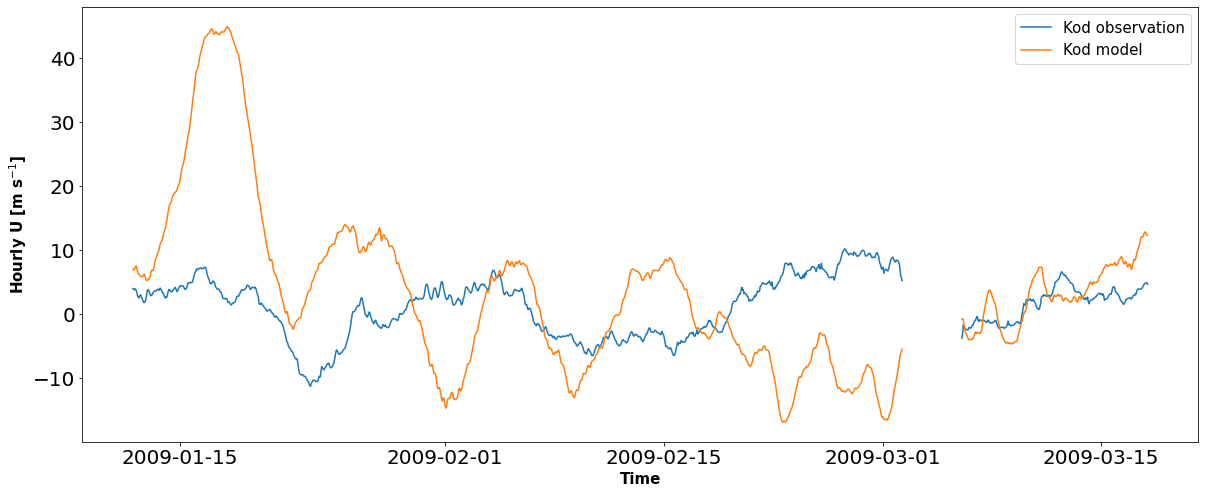

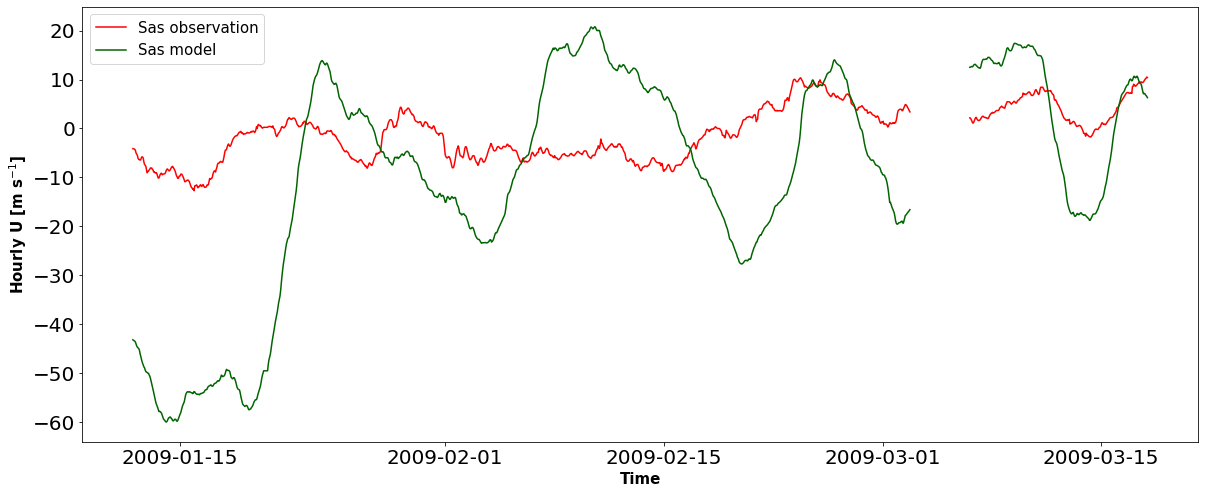

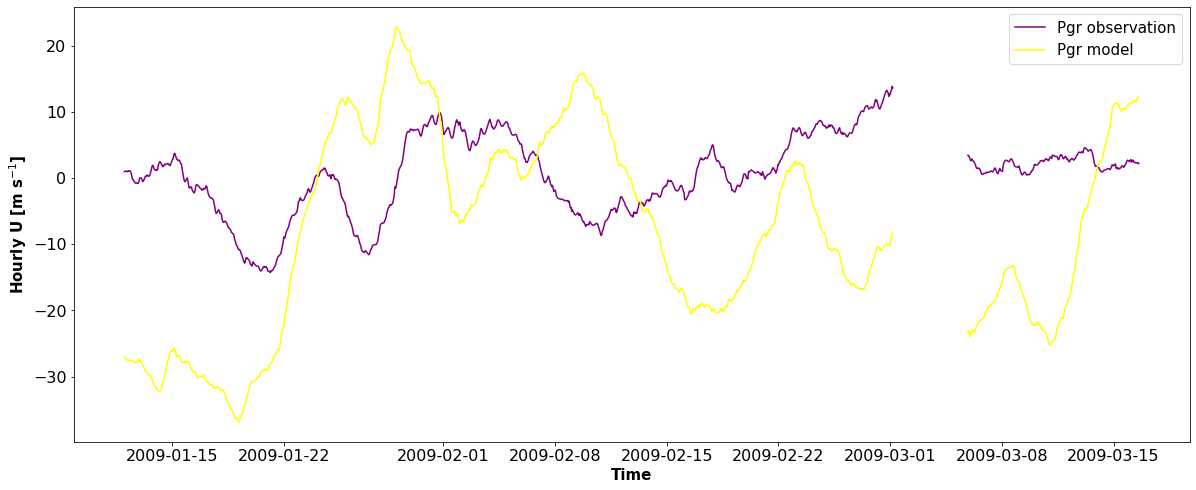

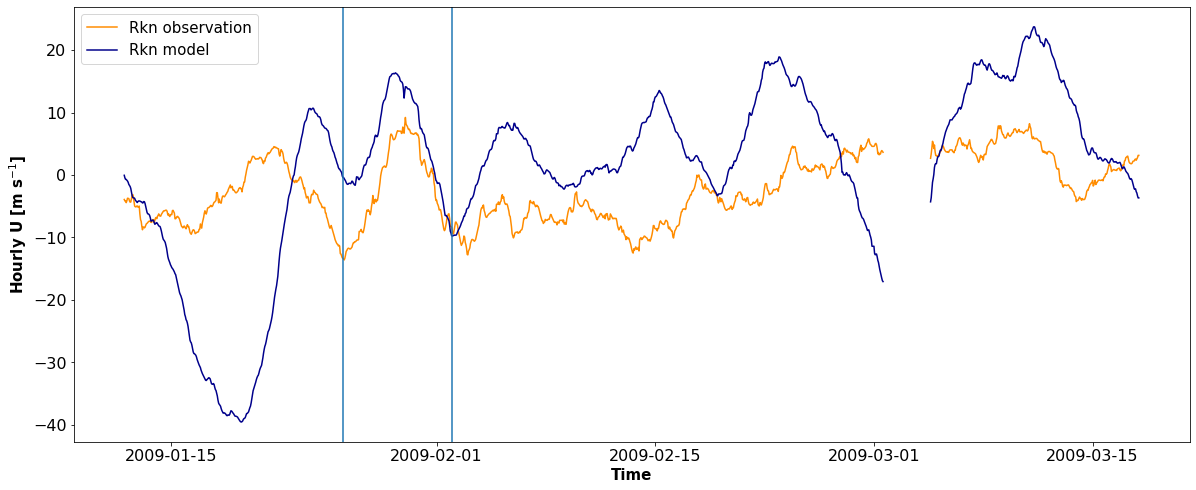

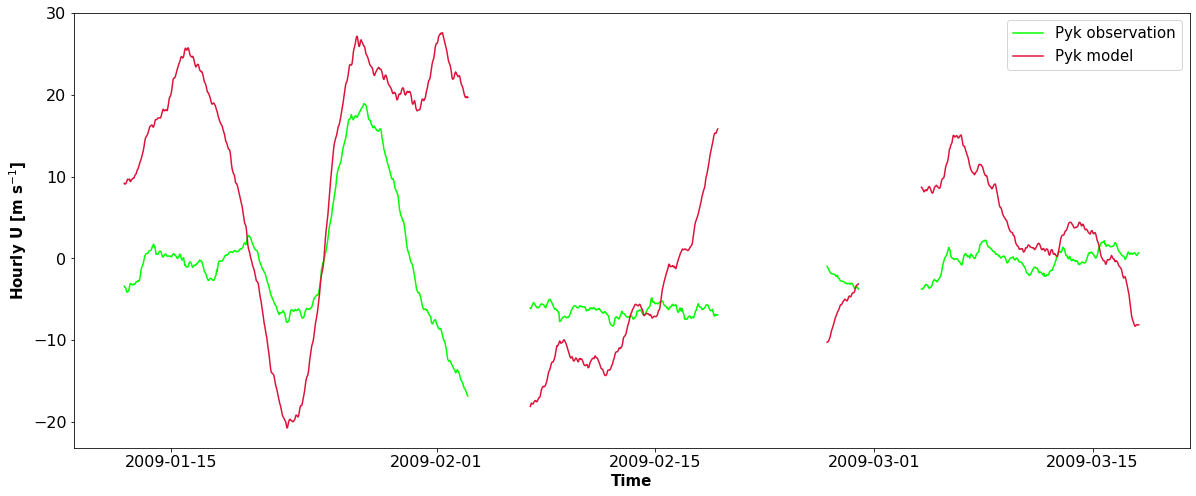

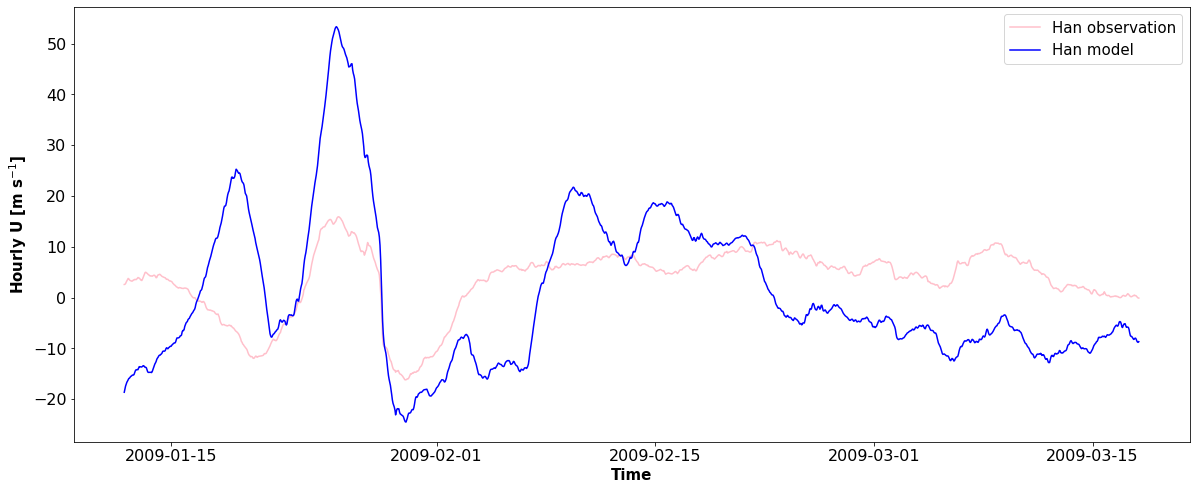

In [6]:
#Kod radar station 
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Kod'], label='Kod observation')
plt.plot(df_w.index,df_w['Kod'], label= 'Kod model')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Sas radar station 
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Sas'], label='Sas observation', color='r')
plt.plot(df_w.index,df_w['Sas'], label= 'Sas model', color='darkgreen')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Pgr radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Pgr'], label='Pgr observation', color = 'purple')
plt.plot(df_w.index,df_w['Pgr'], label= 'Pgr model', color = 'yellow')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Rkn radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Rkn'], label='Rkn observation', color = 'darkorange')
plt.plot(df_w.index,df_w['Rkn'], label= 'Rkn model', color = 'darkblue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.axvline(dt.datetime(2009,1,26))
plt.axvline(dt.datetime(2009,2,2))
plt.legend(fontsize=15)

#Pyk radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Pyk'], label='Pyk observation', color = 'lime')
plt.plot(df_w.index,df_w['Pyk'], label= 'Pyk model', color = 'crimson')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Han radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Han'], label='Han observation', color = 'pink')
plt.plot(df_w.index,df_w['Han'], label= 'Han model', color = 'blue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

In [7]:
x=df.iloc[(df.index>='2009-01-26') & (df.index<='2009-02-2')]
x1=df_w.iloc[(df_w.index>='2009-01-26') & (df_w.index<='2009-02-2')]

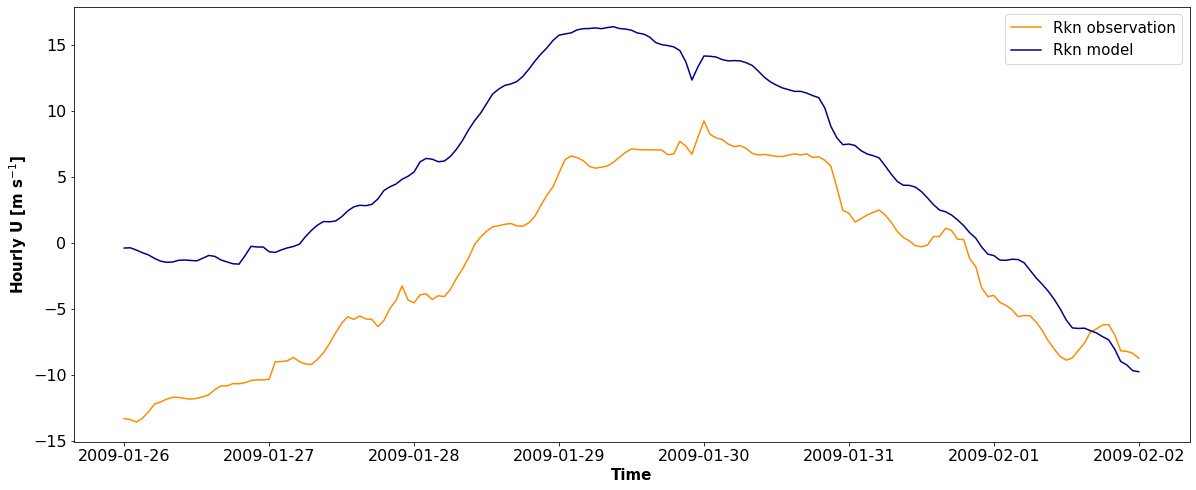

In [8]:
plt.figure(figsize=(20,8))
plt.plot(x.index,x['Rkn'], label='Rkn observation', color = 'darkorange')
plt.plot(x1.index,x1['Rkn'], label= 'Rkn model', color = 'darkblue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

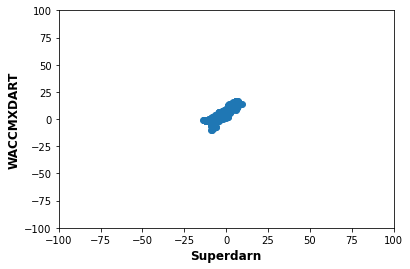

In [9]:
plt.scatter(x['Rkn'],x1['Rkn'])
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.show()

In [10]:
x= 5 

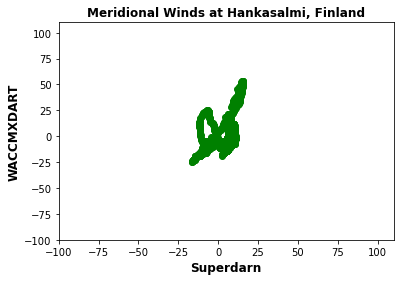

In [11]:
plt.scatter(df['Han'],df_w['Han'], color ='g')
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,110)
plt.xlim(-100,110)
plt.title("Meridional Winds at Hankasalmi, Finland", fontsize=12,fontweight='bold')
plt.show()